In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
pip install duckdb



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
data = pd.read_csv('Summer_olympic_Medals.xls')

In [41]:
#data.head()

# #data exploration
# print(data.head())
# print(data.describe())
# print(data.info())

# #column exploration
print(data.columns)

variance = data.var(numeric_only=True)
print(variance)

Index(['Year', 'Host_country', 'Host_city', 'Country_Name', 'Country_Code',
       'Gold', 'Silver', 'Bronze'],
      dtype='object')
Year      1121.058575
Gold        71.368998
Silver      50.341820
Bronze      46.829100
dtype: float64


Summary Statistics:
               Year   Host_country Host_city   Country_Name Country_Code  \
count   1344.000000           1344      1344           1344         1258   
unique          NaN             21        23            157          155   
top             NaN  United States    London  Great Britain          GBR   
freq            NaN            166       142             29           28   
mean    1978.958333            NaN       NaN            NaN          NaN   
std       33.482213            NaN       NaN            NaN          NaN   
min     1896.000000            NaN       NaN            NaN          NaN   
25%     1956.000000            NaN       NaN            NaN          NaN   
50%     1988.000000            NaN       NaN            NaN          NaN   
75%     2008.000000            NaN       NaN            NaN          NaN   
max     2020.000000            NaN       NaN            NaN          NaN   

               Gold       Silver       Bronze  
count   1344.000000

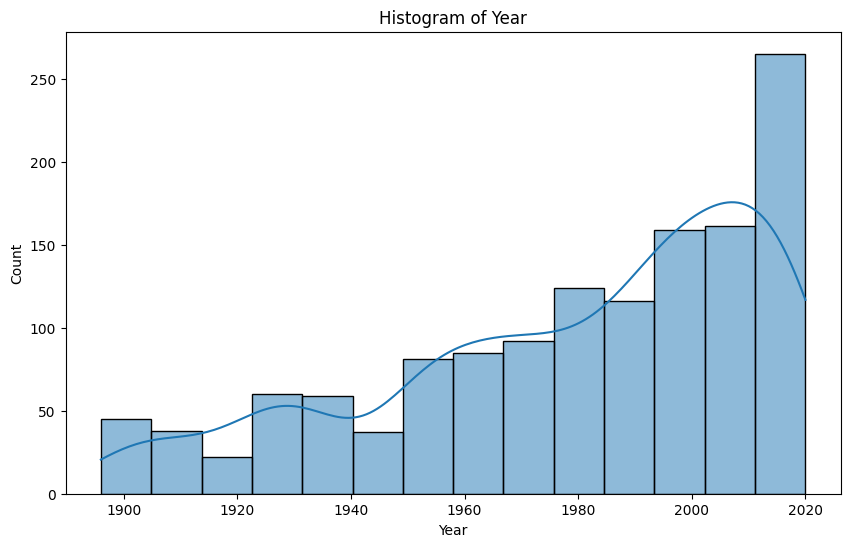

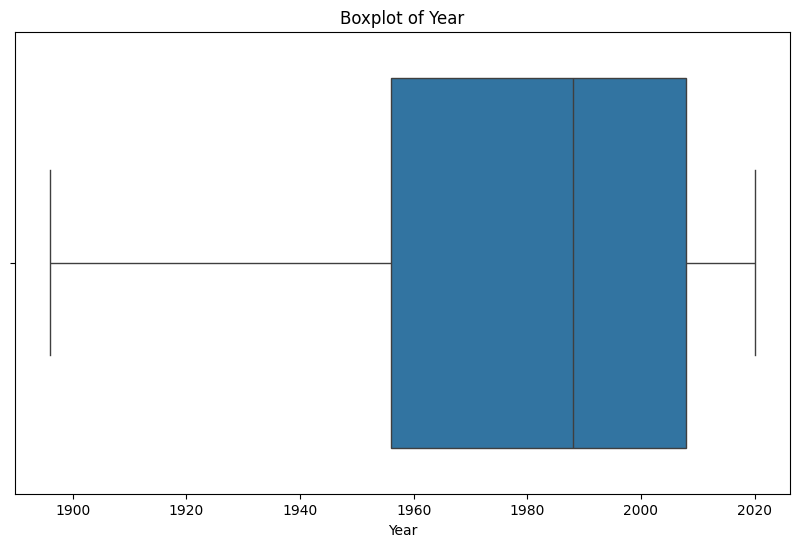


Column: Host_country
Value Counts:
Host_country
United States       166
Great Britain       142
Japan               134
China                87
Brazil               86
Greece               85
Australia            80
Spain                64
South Korea          52
France               48
West Germany         48
Mexico               44
Italy                44
Finland              43
Canada               41
Australia/Sweden     38
Soviet Union         36
Netherlands          33
Germany              32
Belgium              22
Sweden               19
Name: count, dtype: int64


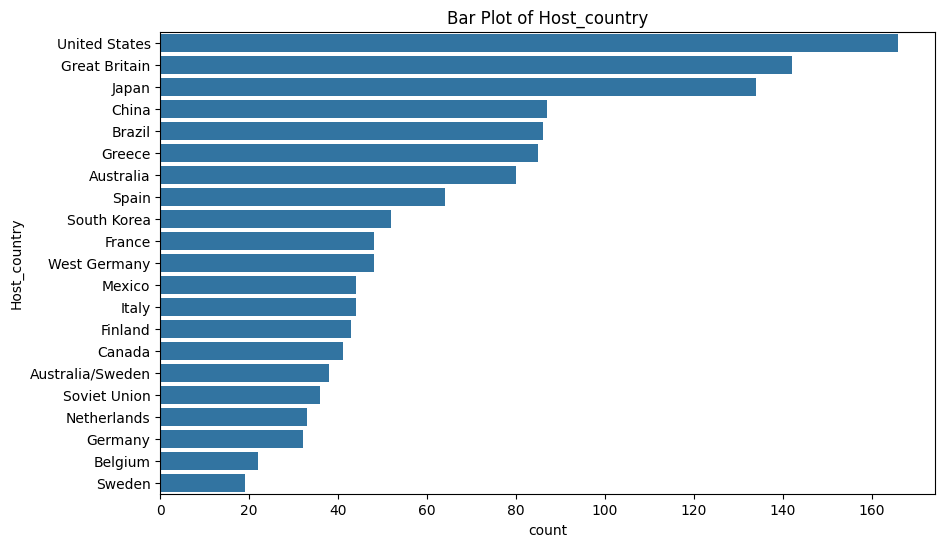


Column: Host_city
Value Counts:
Host_city
London                 142
Tokyo                  134
Beijing                 87
Rio de Janeiro          86
Athens                  85
Sydney                  80
Atlanta                 79
Los Angeles             74
Barcelona               64
Seoul                   52
Munich                  48
Paris                   48
Mexico City             44
Rome                    44
Helsinki                43
Montreal                41
Melbourne/Stockholm     38
Moscow                  36
Amsterdam               33
Berlin                  32
Antwerp                 22
Stockholm               19
St. Louis               13
Name: count, dtype: int64


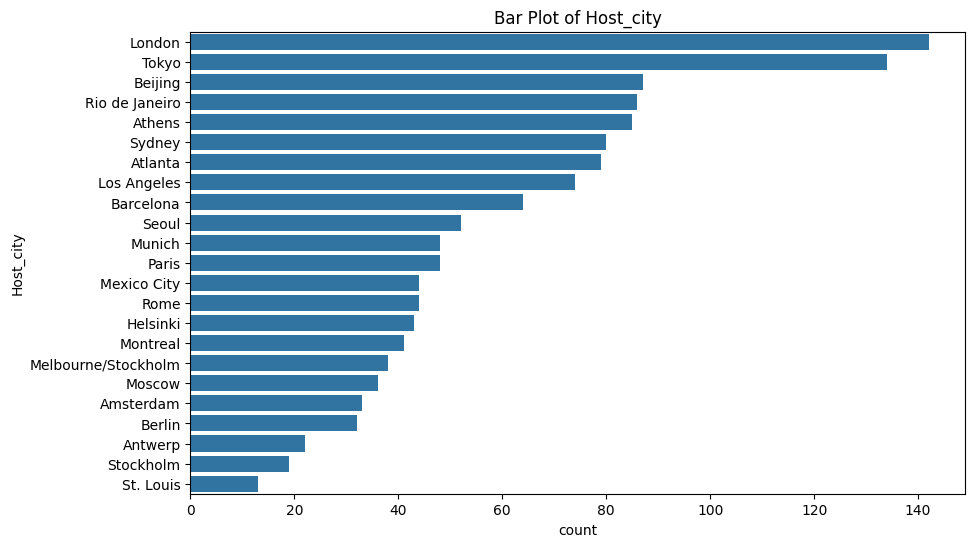


Column: Country_Name
Value Counts:
Country_Name
Great Britain            29
France                   29
United States            28
Switzerland              28
Denmark                  28
                         ..
Sri Lanka                 1
Macedonia                 1
Serbia and Montenegro     1
Paraguay                  1
Burkina Faso              1
Name: count, Length: 157, dtype: int64


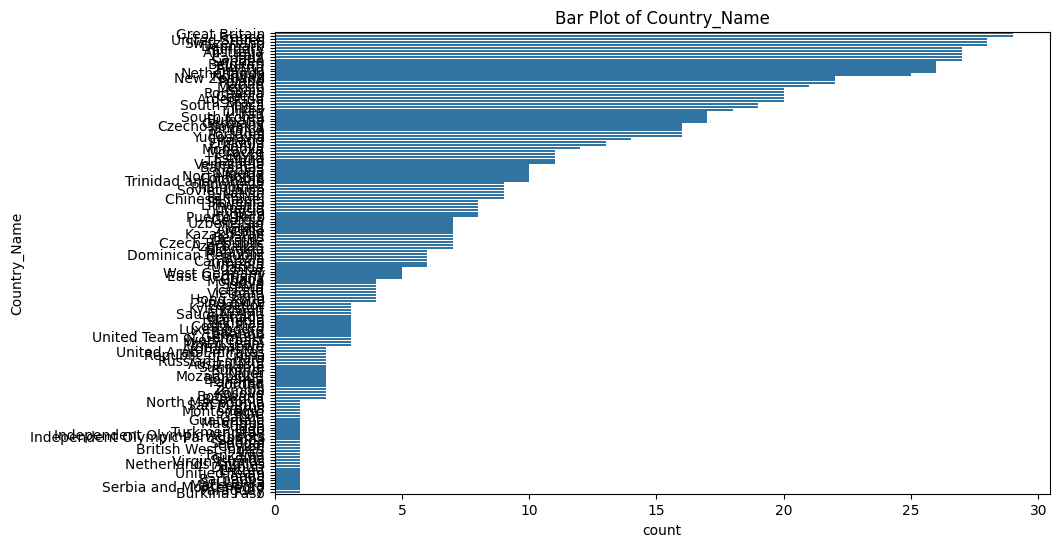


Column: Country_Code
Value Counts:
Country_Code
GBR    28
FRA    28
USA    27
SUI    27
DEN    27
       ..
BAR     1
SRI     1
SCG     1
UAE     1
FIJ     1
Name: count, Length: 155, dtype: int64


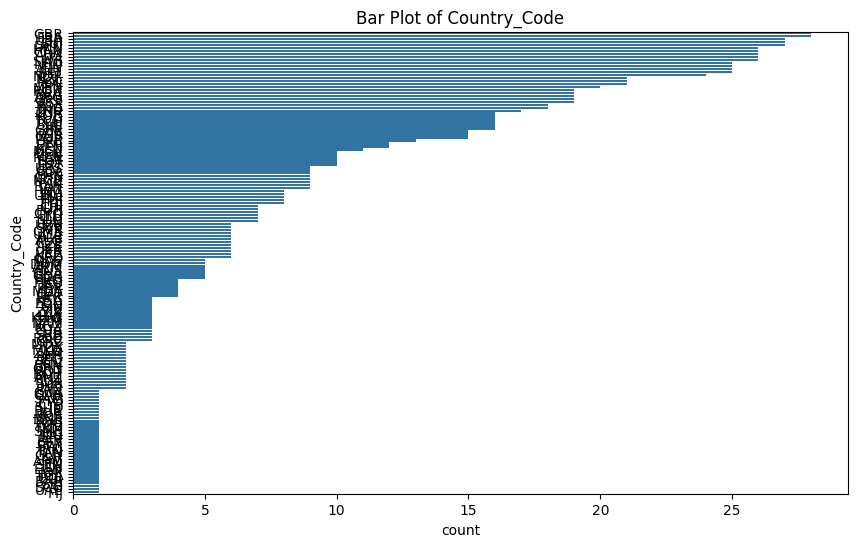


Column: Gold
Summary Statistics:
count    1344.000000
mean        4.069196
std         8.448017
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        83.000000
Name: Gold, dtype: float64


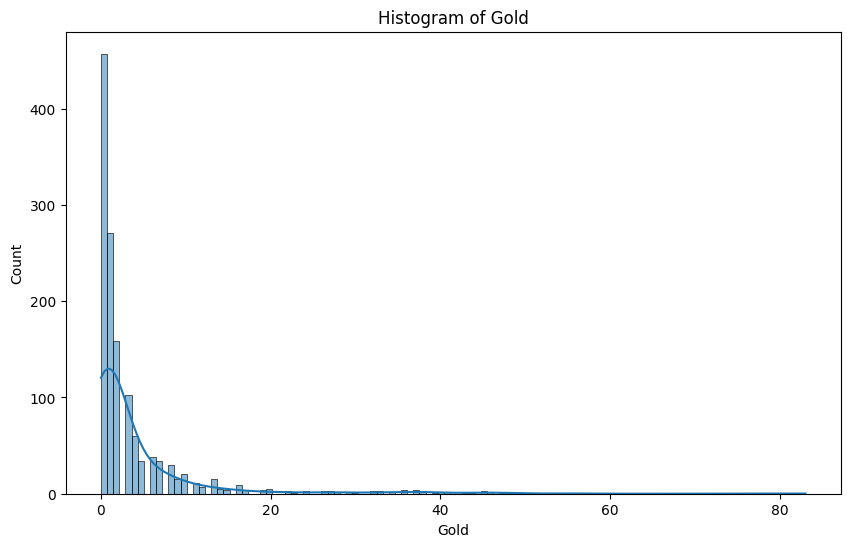

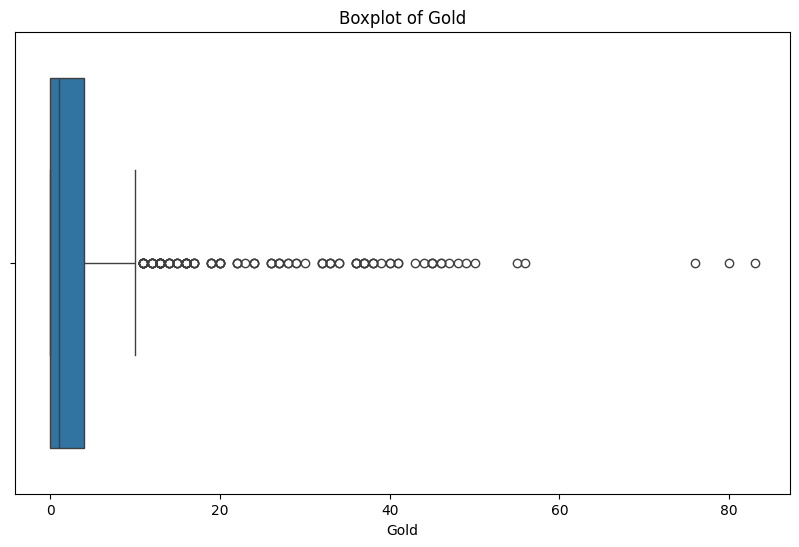


Column: Silver
Summary Statistics:
count    1344.000000
mean        4.037946
std         7.095197
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        78.000000
Name: Silver, dtype: float64


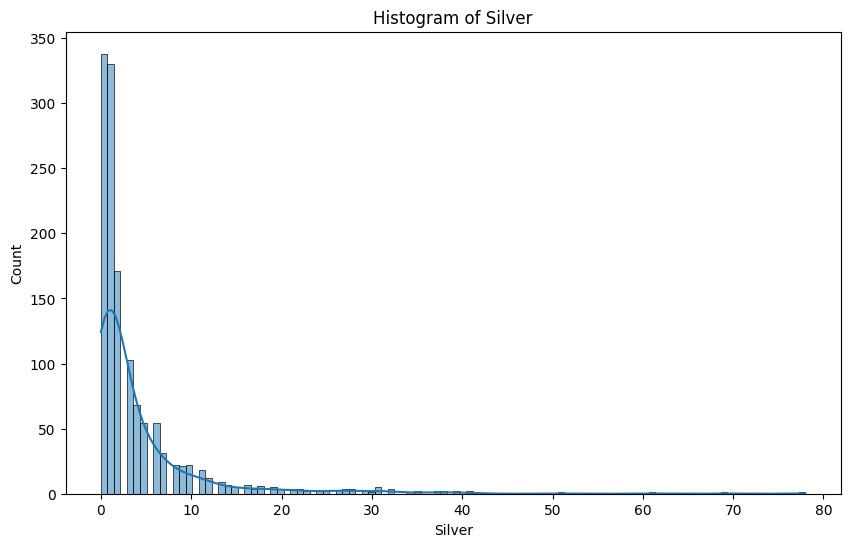

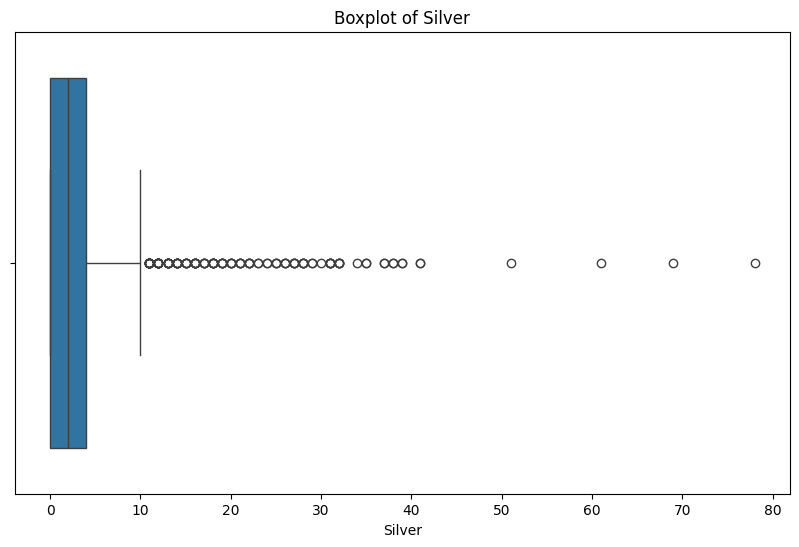


Column: Bronze
Summary Statistics:
count    1344.000000
mean        4.389137
std         6.843179
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        77.000000
Name: Bronze, dtype: float64


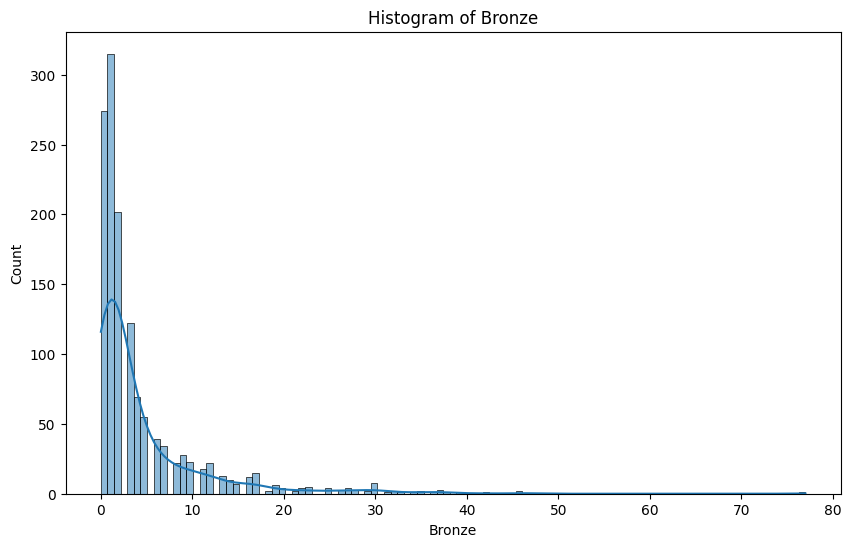

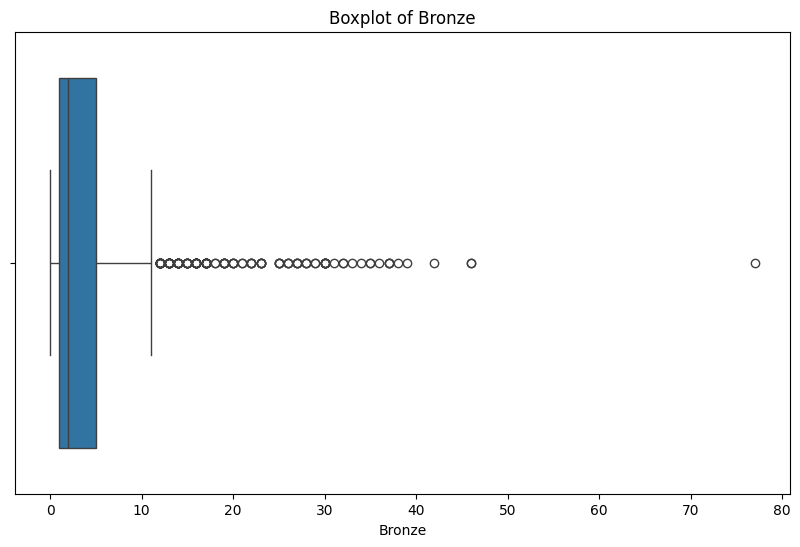


Missing Values and Their Percentages:
Year            0.00000
Host_country    0.00000
Host_city       0.00000
Country_Name    0.00000
Country_Code    6.39881
Gold            0.00000
Silver          0.00000
Bronze          0.00000
dtype: float64


In [23]:
# Initial analysis
summary_stats = data.describe(include='all')
print("Summary Statistics:")
print(summary_stats)

# Distribution analysis
for column in data.columns:
    print(f"\nColumn: {column}")
    
    if data[column].dtype == 'object':
        # For categorical columns
        value_counts = data[column].value_counts()
        print("Value Counts:")
        print(value_counts)
        
        # Plotting bar plot for categorical columns
        plt.figure(figsize=(10, 6))
        sns.countplot(y=column, data=data, order=value_counts.index)
        plt.title(f'Bar Plot of {column}')
        plt.show()
    else:
        # For numerical columns
        print("Summary Statistics:")
        print(data[column].describe())
        
        # Plotting histogram for numerical columns
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()
        
        # Plotting boxplot for numerical columns
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

# Checking for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values and Their Percentages:")
print(missing_percentage)

In [24]:
data.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2


In [32]:
groupby = data.groupby('Year')['Host_country'].count().unique()
groupby

array([11, 21, 13, 19, 22, 27, 33, 32, 37, 43, 38, 44, 41, 48, 36, 47, 52,
       64, 79, 80, 74, 87, 86, 93])